In [1]:
# importing all necessary library needed to run data/nThis project follows the [CRISP-DM](https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome) process to answer the followig questions:
   - How often do developers contribute to OSS?
   - Do Hobyist developers contribute more often to OSS?
   - Does OSS quality perception play a bias role towards OSS contribution?
   - Are experienced developers contributing more frequently to OSS?
   - Do developers contributing to the OSS have a higher income?

In [51]:
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
# import pygwalker as pyg

In [3]:
# reading file and showing top 5 rows to see the content

In [4]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
# pd.set_option('display.max_columns', None)

In [5]:
df.shape


(89184, 84)

In [6]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [7]:
schema

qid        qname                                           question  \
0    QID16           S0  <div><span style="font-size:19px;"><strong>Hel...   
1    QID12     MetaInfo                                  Browser Meta Info   
2   QID310         Q310  <div><span style="font-size:19px;"><strong>You...   
3   QID312         Q120                                                      
4     QID1           S1  <span style="font-size:22px; font-family: aria...   
..     ...          ...                                                ...   
73  QID289  Knowledge_7  Waiting on answers to questions often causes i...   
74  QID289  Knowledge_8  I feel like I have the tools and/or resources ...   
75  QID290  Frequency_1  Needing help from people outside of your immed...   
76  QID290  Frequency_2  Interacting with people outside of your immedi...   
77  QID290  Frequency_3  Encountering knowledge silos (where one indivi...   

   force_resp  type selector  
0       False    DB       TB  
1       False  Meta  Browser  
2       False    DB       TB  
3        True    MC     SAVR  
4       False    DB       TB  
..        ...   ...      ...  
73        NaN    MC     MAVR  
74        NaN    MC     MAVR  
75        NaN    MC     MAVR  
76        NaN    MC     MAVR  
77        NaN    MC     MAVR  

[78 rows x 6 columns]

In [8]:
# Droping columns that irrelevant to the data

In [16]:
df.drop(columns=df.columns[33:74], inplace=True)

In [10]:
df.shape

(89184, 43)

In [11]:
# Checking the ratio of missing values in the Dataframe 

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=True)[:30]

column_name  percent_missing
ResponseId                            ResponseId         0.000000
Q120                                        Q120         0.000000
MainBranch                            MainBranch         0.000000
Age                                          Age         0.000000
Country                                  Country         1.357867
EdLevel                                  EdLevel         1.357867
Employment                            Employment         1.441963
LearnCode                              LearnCode         1.705463
YearsCode                              YearsCode         1.961114
LanguageHaveWorkedWith    LanguageHaveWorkedWith         2.291891
BuyNewTool                            BuyNewTool         6.923888
LanguageWantToWorkWith    LanguageWantToWorkWith         9.502826
ToolsTechHaveWorkedWith  ToolsTechHaveWorkedWith        12.670434
DevType                                  DevType        13.805167
RemoteWork                            RemoteWork        17.238518
CodingActivities                CodingActivities        17.290097
DatabaseHaveWorkedWith    DatabaseHaveWorkedWith        17.658997
LearnCodeOnline                  LearnCodeOnline        21.416398
ToolsTechWantToWorkWith  ToolsTechWantToWorkWith        23.399937
WebframeHaveWorkedWith    WebframeHaveWorkedWith        24.943936
YearsCodePro                        YearsCodePro        25.843201
Currency                                Currency        26.742465
OrgSize                                  OrgSize        27.068757
PurchaseInfluence              PurchaseInfluence        27.157338
PlatformHaveWorkedWith    PlatformHaveWorkedWith        28.655364
DatabaseWantToWorkWith    DatabaseWantToWorkWith        31.701875
TechList                                TechList        31.769151
MiscTechHaveWorkedWith    MiscTechHaveWorkedWith        36.065886
WebframeWantToWorkWith    WebframeWantToWorkWith        36.377601
PlatformWantToWorkWith    PlatformWantToWorkWith        42.469501

In [22]:
print("columns with no missing values: ", set(df.columns[df.isnull().mean() == 0.0]))

columns with no missing values:  {'ResponseId', 'Q120', 'Age', 'MainBranch'}


In [40]:
age_vals = df.Age.value_counts(ascending = True)
age_vals_percentage = (age_vals[2:] * 100 / df.Age.dropna().shape[0])
age_vals_percentage

Age
55-64 years old        3.803373
Under 18 years old     4.628633
45-54 years old        9.344726
18-24 years old       20.105624
35-44 years old       23.022067
25-34 years old       37.279108
Name: count, dtype: float64

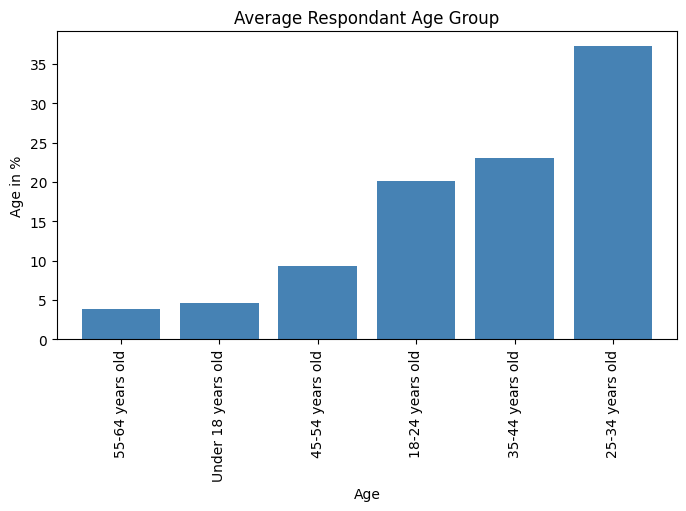

In [49]:

plt.ylabel("Age in %")
plt.title("Average Respondant Age Group")
ax = age_vals_percentage.plot(kind="bar",figsize=(8,4), width = 0.8, edgecolor=None, color="steelblue")
plt.show()